**Keras** is a high-level api that is designed to be simple, flexible, and powerful - allowing everyone from beginners to advanced users to quickly build, train, and evaluate models. 

**Keras 3.0**, or **Keras Core**, is a full rewrite of the Keras codebase that rebases it on top of a modular backend architecture. It makes it possible to run Keras workflows on top of arbitrary frameworks — starting with TensorFlow, JAX, and PyTorch.

In [ ]:
# You can use 'tensorflow', 'torch' or 'jax' as backend. Make sure to set the environment variable before importing.
# The backend must be set before importing Keras. Once Keras is imported, the backend cannot be changed within the same Python session.
import os
os.environ["KERAS_BACKEND"] = "torch"

In [1]:
import keras
keras.__version__

'3.12.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mlflow

from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [4]:
NUM_CLASSES = 10
INPUT_SHAPE = (28, 28, 1)
BATCH_SIZE = 5000  # adjust this based on the memory of your machine
EPOCHS = 10

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [6]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28, 1) y_train shape: (60000,)


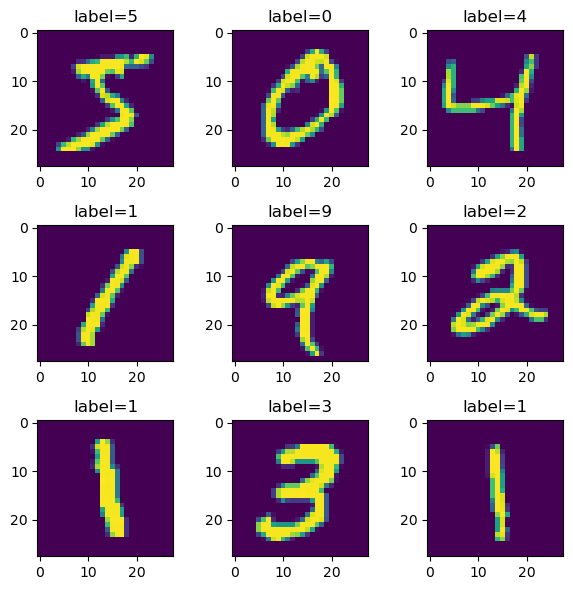

In [7]:
grid = 3
fig, axes = plt.subplots(grid, grid, figsize=(6, 6))
for i in range(grid):
  for j in range(grid):
      axes[i][j].imshow(X_train[i * grid + j])
      axes[i][j].set_title(f"label={y_train[i * grid + j]}")
plt.tight_layout()

In [8]:
#Encoding the output class label (One-Hot Encoding)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [9]:
# Data Normalization
#normalize the data dimensions so that they are of approximately the same scale.
X_train/=255
X_test/=255

In [10]:
# Note you only need to define the input data shape with the first layer. 
# The last layers is a dense layer with softmax activation that classifies the 10 categories of data in fashion_mnist.

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=INPUT_SHAPE))    # Must define the input shape in the first layer of the neural network
model.add(MaxPooling2D(pool_size=(2,2) , strides =(1,1),  padding='valid' ))                                # MaxPooling layer
model.add(Dropout(0.2))                                                                                     # Dropout layer to avoid overfitting
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2 , padding='valid'))
model.add(Dropout(0.3))
model.add(Flatten())                                                                                        # Flattening the 2D arrays for fully connected layers     
model.add(Dense(128, activation='relu'))                                                                    # Fully connected layer 1
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))                                                         # Fully connected layer 2 (Output layer)   
# Take a look at the model summary
model.summary()

/Users/debajyotidas/anaconda3_arm/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-10 23:42:04.965915: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-12-10 23:42:04.965953: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-12-10 23:42:04.965964: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 12.48 GB
2025-12-10 23:42:04.966105: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-10 23:42:04.966116: I tensorflow/core/common_runtime/pluggable_device/plug

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 703,210 (2.68 MB)

 Trainable params: 703,210 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train ,batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 822ms/step - accuracy: 0.6733 - loss: 1.1182 - val_accuracy: 0.8871 - val_loss: 0.5554
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 791ms/step - accuracy: 0.8641 - loss: 0.4656 - val_accuracy: 0.9123 - val_loss: 0.3654
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 793ms/step - accuracy: 0.8902 - loss: 0.3754 - val_accuracy: 0.9229 - val_loss: 0.3075
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 803ms/step - accuracy: 0.9023 - loss: 0.3290 - val_accuracy: 0.9334 - val_loss: 0.2613
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 807ms/step - accuracy: 0.9130 - loss: 0.2912 - val_accuracy: 0.9395 - val_loss: 0.2286
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 795ms/step - accuracy: 0.9194 - loss: 0.2710 - val_accuracy: 0.9454 - val_loss: 0.2161
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 807ms/step - accuracy: 0.9225 - loss: 0.2601 - val_accuracy: 0.9479 - val_loss: 0.2009
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 799ms/step - accuracy: 0.9226 - loss: 0.2534 - val_accu

In [28]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9534000158309937


In [12]:
# Start MLFlow server for experiment tracking
# mlflow server --backend-store-uri sqlite:///mlflow.db --port 5000

# The set_experiment API creates a new experiment if it doesn't exist.
mlflow.set_tracking_uri("http://127.0.0.1:5000")                # Point to the remote MLflow server via REST API
mlflow.set_experiment("MNIST with Keras and PyTorch Backend")

# IMPORTANT: Enable system metrics monitoring
mlflow.config.enable_system_metrics_logging()
mlflow.config.set_system_metrics_sampling_interval(1)

In [ ]:
run = mlflow.start_run()
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, callbacks=[mlflow.keras.MlflowCallback(run)], verbose=1)
mlflow.end_run()

2025/12/10 23:08:36 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/12/10 23:08:36 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9303 - loss: 0.2213 - val_accuracy: 0.9627 - val_loss: 0.1236
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9315 - loss: 0.2158 - val_accuracy: 0.9630 - val_loss: 0.1198
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9337 - loss: 0.2097 - val_accuracy: 0.9657 - val_loss: 0.1159
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9328 - loss: 0.2127 - val_accuracy: 0.9655 - val_loss: 0.1167
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9333 - loss: 0.2127 - val_accuracy: 0.9687 - val_loss: 0.1053
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9341 - loss: 0.2095 - val_accuracy: 0.9685 - val_loss: 0.1080
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9321 - loss: 0.2128 - val_accuracy: 0.9702 - val_loss: 0.1088
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9313 - loss: 0.2171 - val_accuracy: 0.9697 - val_loss:

2025/12/10 23:11:04 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/12/10 23:11:04 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


🏃 View run intrigued-mare-613 at: http://127.0.0.1:5000/#/experiments/6/runs/c781a30fbdb045d4bcfacb28c24a6f81
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


Within each epoch, the training dataset is broken down to batches based on the defined **BATCH_SIZE**. If we set the callback to not log based on epochs with **log_every_epoch=False**, and to log every 5 batches with **log_every_n_steps=5**, we can adjust the logging to be based on the batches.

In [13]:
with mlflow.start_run() as run:
  model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, callbacks=[mlflow.keras.MlflowCallback(run, log_every_epoch=False, log_every_n_steps=5)], verbose=1)
  model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1, callbacks=[mlflow.keras.MlflowCallback(run)], verbose=1)

2025/12/10 23:42:20 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/12/10 23:42:20 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2025/12/10 23:42:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: MlflowCallback.__init__() got multiple values for argument 'log_every_epoch'


Epoch 1/10


2025-12-10 23:42:21.296782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025/12/10 23:42:23 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.0992 - loss: 2.3251

2025/12/10 23:42:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.1607 - loss: 2.2698

2025/12/10 23:42:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.2090 - loss: 2.2188

2025/12/10 23:42:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.2501 - loss: 2.1677

2025/12/10 23:42:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.2858 - loss: 2.1159

2025/12/10 23:42:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.3164 - loss: 2.0640

2025/12/10 23:42:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.3426 - loss: 2.0130

2025/12/10 23:42:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.3656 - loss: 1.9634

2025/12/10 23:42:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.3858 - loss: 1.9157

2025/12/10 23:42:25 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.4039 - loss: 1.8701

2025/12/10 23:42:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.4199 - loss: 1.8282

2025/12/10 23:42:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 279ms/step - accuracy: 0.5800 - loss: 1.4083 - val_accuracy: 0.8655 - val_loss: 0.4668
Epoch 2/10


2025/12/10 23:42:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.7670 - loss: 0.7252

2025/12/10 23:42:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.7691 - loss: 0.7179

2025/12/10 23:42:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.7731 - loss: 0.7056

2025/12/10 23:42:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7768 - loss: 0.6957

2025/12/10 23:42:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.7799 - loss: 0.6878

2025/12/10 23:42:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.7829 - loss: 0.6802

2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7858 - loss: 0.6734

2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7884 - loss: 0.6668

2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7909 - loss: 0.6606

2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7934 - loss: 0.6542

2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7957 - loss: 0.6483

2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.8188 - loss: 0.5897 - val_accuracy: 0.9093 - val_loss: 0.2998
Epoch 3/10


2025/12/10 23:42:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8596 - loss: 0.4798

2025/12/10 23:42:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.8595 - loss: 0.4846

2025/12/10 23:42:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.8602 - loss: 0.4836

2025/12/10 23:42:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8604 - loss: 0.4824

2025/12/10 23:42:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.8611 - loss: 0.4803

2025/12/10 23:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8620 - loss: 0.4775

2025/12/10 23:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8630 - loss: 0.4743

2025/12/10 23:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8639 - loss: 0.4710

2025/12/10 23:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8647 - loss: 0.4682

2025/12/10 23:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.8653 - loss: 0.4658

2025/12/10 23:42:30 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.8660 - loss: 0.4635

2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8721 - loss: 0.4409 - val_accuracy: 0.9343 - val_loss: 0.2294
Epoch 4/10


2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.8860 - loss: 0.4007

2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.8851 - loss: 0.4065

2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.8849 - loss: 0.4066

2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8852 - loss: 0.4043

2025/12/10 23:42:31 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8856 - loss: 0.4021

2025/12/10 23:42:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8861 - loss: 0.3994

2025/12/10 23:42:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8866 - loss: 0.3965

2025/12/10 23:42:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8870 - loss: 0.3940

2025/12/10 23:42:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8875 - loss: 0.3916

2025/12/10 23:42:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8878 - loss: 0.3897

2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8881 - loss: 0.3883

2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.8907 - loss: 0.3740 - val_accuracy: 0.9420 - val_loss: 0.1977
Epoch 5/10


2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9026 - loss: 0.3271

2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9014 - loss: 0.3325

2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9010 - loss: 0.3366

2025/12/10 23:42:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.9010 - loss: 0.3375

2025/12/10 23:42:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.9011 - loss: 0.3370

2025/12/10 23:42:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9013 - loss: 0.3366

2025/12/10 23:42:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9015 - loss: 0.3361

2025/12/10 23:42:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9017 - loss: 0.3356

2025/12/10 23:42:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9018 - loss: 0.3352

2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9020 - loss: 0.3350

2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9022 - loss: 0.3345

2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.9044 - loss: 0.3297 - val_accuracy: 0.9528 - val_loss: 0.1667
Epoch 6/10


2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9070 - loss: 0.3121

2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9103 - loss: 0.3061

2025/12/10 23:42:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9110 - loss: 0.3029

2025/12/10 23:42:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.9115 - loss: 0.3016

2025/12/10 23:42:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.9118 - loss: 0.3008

2025/12/10 23:42:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9123 - loss: 0.2998

2025/12/10 23:42:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9128 - loss: 0.2987

2025/12/10 23:42:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9133 - loss: 0.2978

2025/12/10 23:42:36 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9137 - loss: 0.2971

2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9141 - loss: 0.2964

2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9144 - loss: 0.2957

2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9176 - loss: 0.2886 - val_accuracy: 0.9608 - val_loss: 0.1428
Epoch 7/10


2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.9264 - loss: 0.2417

2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9254 - loss: 0.2499

2025/12/10 23:42:37 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9253 - loss: 0.2541

2025/12/10 23:42:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9253 - loss: 0.2560

2025/12/10 23:42:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9253 - loss: 0.2581

2025/12/10 23:42:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9255 - loss: 0.2589

2025/12/10 23:42:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9258 - loss: 0.2591

2025/12/10 23:42:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9260 - loss: 0.2594

2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9262 - loss: 0.2594

2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9264 - loss: 0.2595

2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9266 - loss: 0.2595

2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9285 - loss: 0.2590 - val_accuracy: 0.9690 - val_loss: 0.1218
Epoch 8/10


2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.9274 - loss: 0.2461

2025/12/10 23:42:39 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9308 - loss: 0.2385

2025/12/10 23:42:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.9315 - loss: 0.2391

2025/12/10 23:42:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9322 - loss: 0.2375

2025/12/10 23:42:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9330 - loss: 0.2362

2025/12/10 23:42:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9334 - loss: 0.2360

2025/12/10 23:42:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9338 - loss: 0.2357

2025/12/10 23:42:40 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9341 - loss: 0.2353

2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9344 - loss: 0.2347

2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9347 - loss: 0.2343

2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9350 - loss: 0.2338

2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.9379 - loss: 0.2283 - val_accuracy: 0.9733 - val_loss: 0.1093
Epoch 9/10


2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.9464 - loss: 0.2070

2025/12/10 23:42:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9435 - loss: 0.2153

2025/12/10 23:42:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9427 - loss: 0.2182

2025/12/10 23:42:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9424 - loss: 0.2187

2025/12/10 23:42:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9423 - loss: 0.2189

2025/12/10 23:42:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9422 - loss: 0.2188

2025/12/10 23:42:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9423 - loss: 0.2179

2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9424 - loss: 0.2172

2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9425 - loss: 0.2165

2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9426 - loss: 0.2157

2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9427 - loss: 0.2151

2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9441 - loss: 0.2083 - val_accuracy: 0.9773 - val_loss: 0.0956
Epoch 10/10


2025/12/10 23:42:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9438 - loss: 0.2115

2025/12/10 23:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9452 - loss: 0.2066

2025/12/10 23:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 3/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9459 - loss: 0.2045

2025/12/10 23:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 4/11 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9466 - loss: 0.2031

2025/12/10 23:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 5/11 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.9471 - loss: 0.2025

2025/12/10 23:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9476 - loss: 0.2015

2025/12/10 23:42:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9479 - loss: 0.2006

2025/12/10 23:42:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9480 - loss: 0.1998

2025/12/10 23:42:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9482 - loss: 0.1990

2025/12/10 23:42:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9484 - loss: 0.1982

2025/12/10 23:42:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_n_steps'


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.9486 - loss: 0.1977

2025/12/10 23:42:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'model_id'
2025/12/10 23:42:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCallback' object has no attribute 'log_every_epoch'


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9502 - loss: 0.1919 - val_accuracy: 0.9798 - val_loss: 0.0916


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9526 - loss: 0.1854 - val_accuracy: 0.9807 - val_loss: 0.0899
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9539 - loss: 0.1886 - val_accuracy: 0.9810 - val_loss: 0.0910
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9554 - loss: 0.1919 - val_accuracy: 0.9820 - val_loss: 0.0936
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9550 - loss: 0.2008 - val_accuracy: 0.9832 - val_loss: 0.0923
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.9572 - loss: 0.2154 - val_accuracy: 0.9823 - val_loss: 0.1026
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.9559 - loss: 0.2340 - val_accuracy: 0.9828 - val_loss: 0.1082
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9540 - loss: 0.2680 - val_accuracy: 0.9838 - val_loss: 0.1295
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9525 - loss: 0.3120 - val_accuracy: 0.

2025/12/10 23:43:07 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/12/10 23:43:07 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


🏃 View run youthful-snail-792 at: http://127.0.0.1:5000/#/experiments/6/runs/e6fa11bd99104c36a64609d048821134
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


In [14]:
with mlflow.start_run() as run:
  model.evaluate(X_test, y_test, callbacks=[mlflow.keras.MlflowCallback(run)])

2025/12/10 23:47:18 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/12/10 23:47:18 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9779 - loss: 0.1720


2025/12/10 23:47:22 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/12/10 23:47:22 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


🏃 View run rogue-bat-646 at: http://127.0.0.1:5000/#/experiments/6/runs/7864780b07ec467e8fc7423d960056c0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6
